## Data set statistics

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define dataset path (change this path to your dataset folder)
dataset_path = 'E:/Desktop/Plants - Copy'

# Initialize lists to store image resolutions 
image_heights = []
image_widths = []

# Dictionary to count images per class
class_counts = {}


In [3]:
# Loop through each fruit category folder
for fruit_class in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, fruit_class)
    if os.path.isdir(class_folder):
        count = 0
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            img = cv2.imread(image_path)
            if img is not None:
                height, width = img.shape[:2]
                image_heights.append(height)
                image_widths.append(width)
                count += 1
        # Save the count for this class
        class_counts[fruit_class] = count

# Convert lists to NumPy arrays
image_heights = np.array(image_heights)
image_widths = np.array(image_widths)

print(f"Total images: {len(image_heights)}")
print(f"Classes found: {list(class_counts.keys())}")


Total images: 30713
Classes found: ['apple', 'banana', 'cantaloupe', 'cherry', 'grape', 'kiwifruit', 'mango', 'orange', 'pineapple', 'Strawberry', 'watermelon']


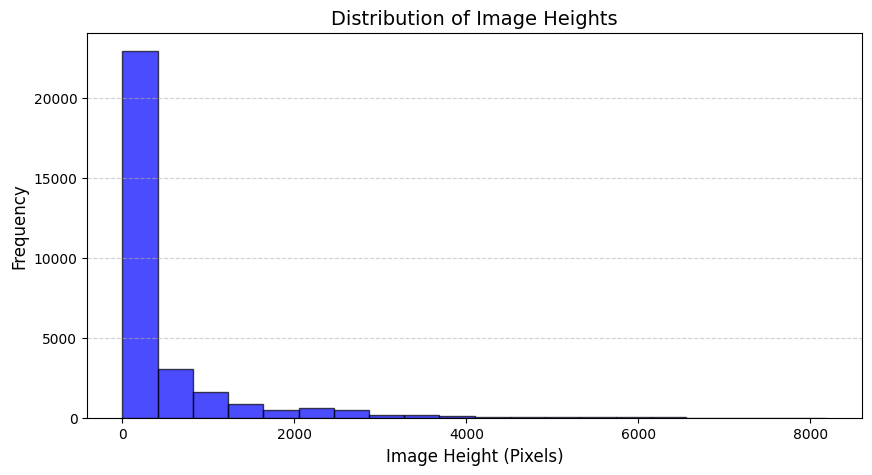

In [11]:
# --- Histogram for Image Heights ---
plt.figure(figsize=(10, 5))
plt.hist(image_heights, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Image Height (Pixels)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Image Heights", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

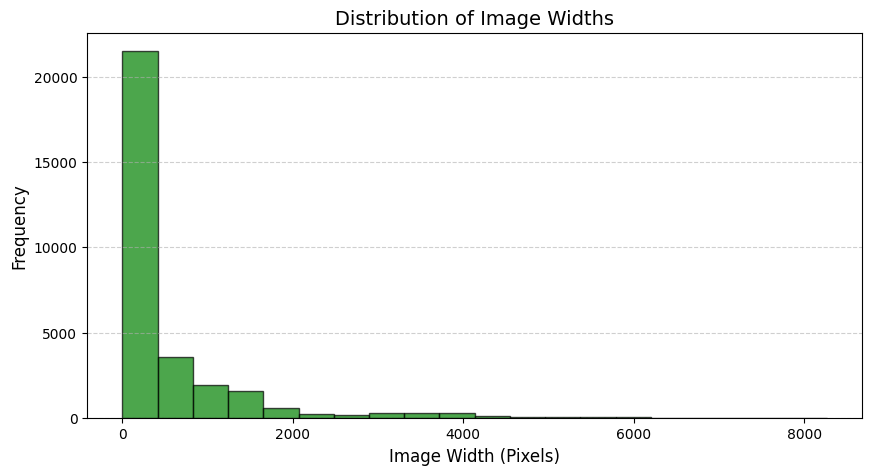

In [5]:
# --- Histogram for Image Widths ---
plt.figure(figsize=(10, 5))
plt.hist(image_widths, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel("Image Width (Pixels)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Image Widths", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<positron-console-cell-6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



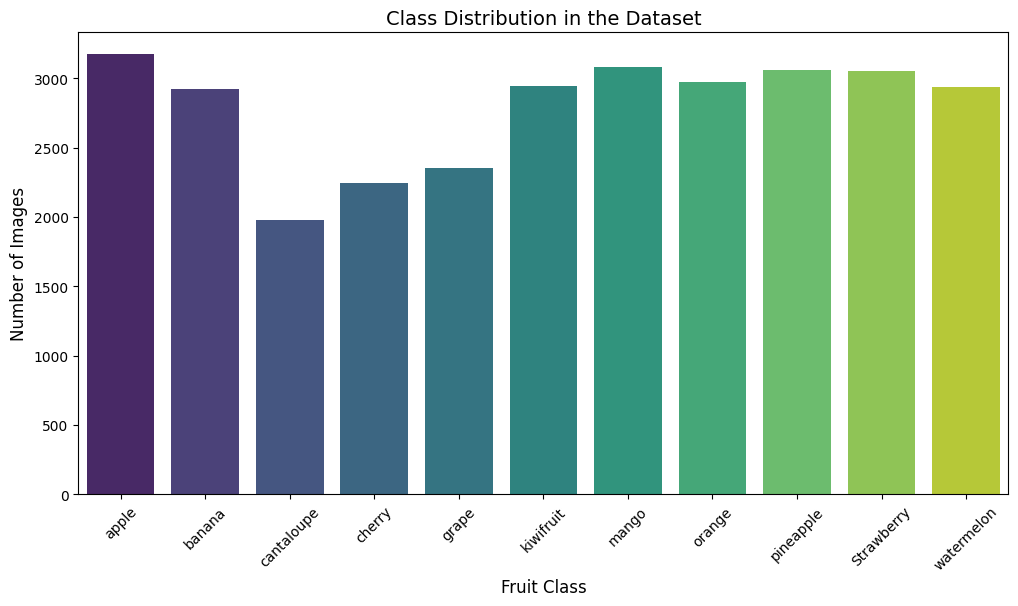

In [6]:
# --- Class Imbalance Analysis ---
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.xlabel("Fruit Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Class Distribution in the Dataset", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Load a single image for augmentation demo
image_path = "C:/Users/inafe/OneDrive/Desktop/Plants - Copy/watermelon/91.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = image.astype(np.float32) / 255.0  # Normalize pixel values

# Expand dimensions to match ImageDataGenerator input format
image = np.expand_dims(image, axis=0)


In [9]:
# Define augmentation generators
augmentations = {
    "Rotation (50°)": tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=50),
    "Width Shift (40%)": tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.4),
    "Height Shift (35%)": tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.35),
    "Zoom (30%)": tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.3),
}

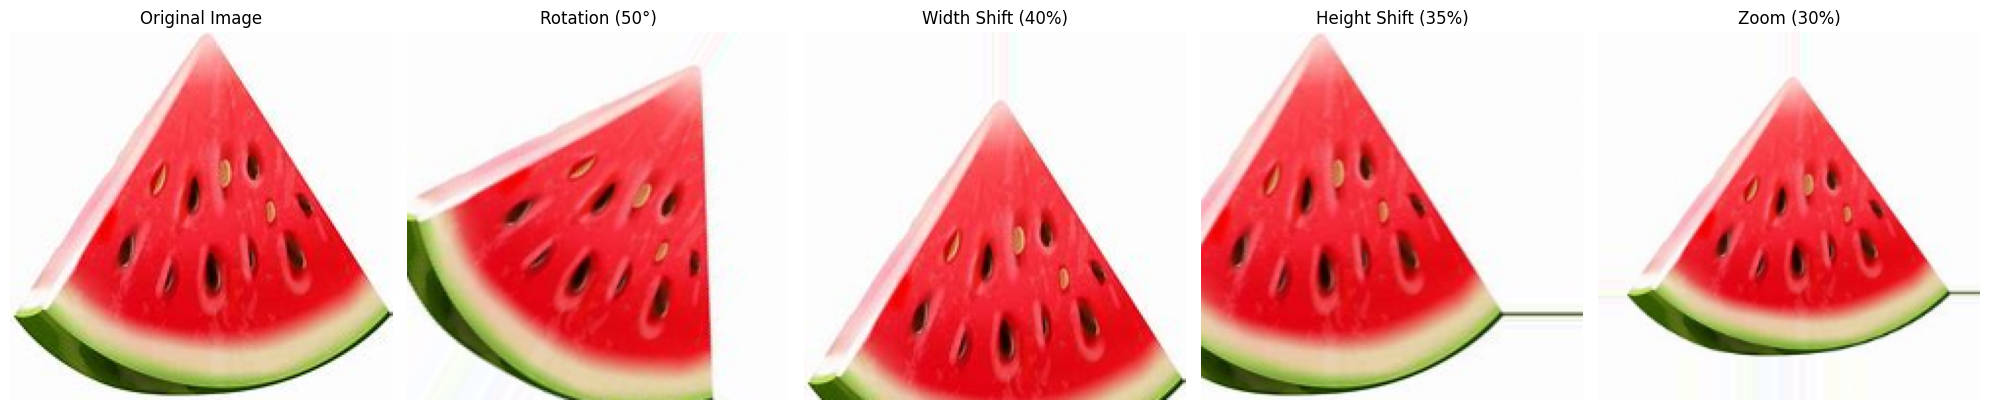

In [10]:
# Apply each augmentation separately
augmented_images = {label: gen.flow(image, batch_size=1).__next__()[0] 
                    for label, gen in augmentations.items()}

# Plot original + augmented
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
axes[0].imshow(image[0])  # Original image
axes[0].set_title("Original Image")

# Augmented images
for ax, (label, img) in zip(axes[1:], augmented_images.items()):
    ax.imshow(img)
    ax.set_title(label)

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()